In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import plotly.express as px
from statsmodels.graphics.factorplots import interaction_plot

In [93]:
df = pd.read_csv('student.csv')

In [94]:
# Verify if you have the correct data 

df.head(10)

,sex,internet,studytime,familysize,age,score
0,F,no,2. 2 - 5 hours,>3,18,6
1,F,yes,2. 2 - 5 hours,>3,17,6
2,F,yes,2. 2 - 5 hours,<=3,15,10
3,F,yes,3. 5 - 10 hours,>3,15,15
4,F,no,2. 2 - 5 hours,>3,16,10
5,M,yes,2. 2 - 5 hours,<=3,16,15
6,M,yes,2. 2 - 5 hours,<=3,16,11
7,F,no,2. 2 - 5 hours,>3,17,6
8,M,yes,2. 2 - 5 hours,<=3,15,19
9,M,yes,2. 2 - 5 hours,>3,15,15


In [4]:
# Verify if you have the correct data 

df.tail(10)

,sex,internet,studytime,familysize,age,score
385,F,no,3. 5 - 10 hours,>3,18,10
386,F,yes,1. <2 hours,>3,18,6
387,F,yes,3. 5 - 10 hours,>3,19,0
388,F,yes,2. 2 - 5 hours,<=3,18,8
389,F,no,2. 2 - 5 hours,>3,18,0
390,M,no,2. 2 - 5 hours,<=3,20,9
391,M,yes,1. <2 hours,<=3,17,16
392,M,no,1. <2 hours,>3,21,7
393,M,yes,1. <2 hours,<=3,18,10
394,M,yes,1. <2 hours,<=3,19,9


In [5]:
# Make sure all your columns have

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   internet    395 non-null    object
 2   studytime   395 non-null    object
 3   familysize  395 non-null    object
 4   age         395 non-null    int64 
 5   score       395 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 18.6+ KB


In [6]:

df.describe()

,age,score
count,395.000000,395.000000
mean,16.696203,10.415190
std,1.276043,4.581443
min,15.000000,0.000000
25%,16.000000,8.000000
50%,17.000000,11.000000
75%,18.000000,14.000000
max,22.000000,20.000000


# Sample size

In [95]:
pa = len(df)

print('The sample size is:', pa)

The sample size is: 395


# Students per gender

In [8]:
# In the data were 208 feamle and 187 male 

table = pd.pivot_table(df, index = 'sex', values = 'score', columns = None, aggfunc = 'count').reset_index
table

<bound method DataFrame.reset_index of      score
sex       
F      208
M      187>

Text(0.5, 0, 'Sex')

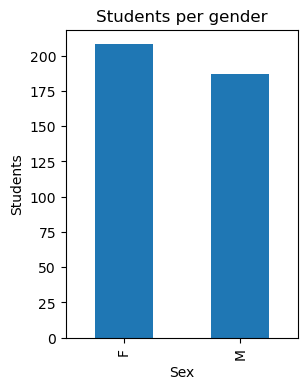

In [78]:
df['sex'].value_counts().plot(kind = 'bar', figsize = (3,4),)
plt.title('Students per gender')
plt.ylabel('Students')
plt.xlabel('Sex')

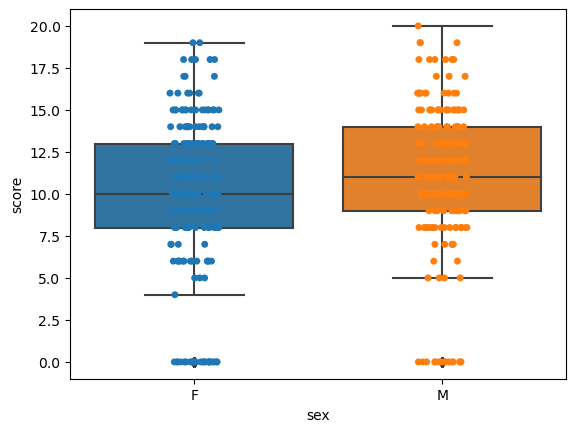

In [96]:
# This type of representation allows a preliminary identification of asymmetries, outliers and difference in variance
# In this case female and male seem to follow asymmetrical distribution.
# At both of them some values are extreme 
#The size of the boxes is similar for both of them, there is no indication of a lack of homoscedasticity

ax_s = sns.boxplot(x='sex', y='score', data=df)
ax_s = sns.stripplot(x= 'sex', y= 'score', data=df)

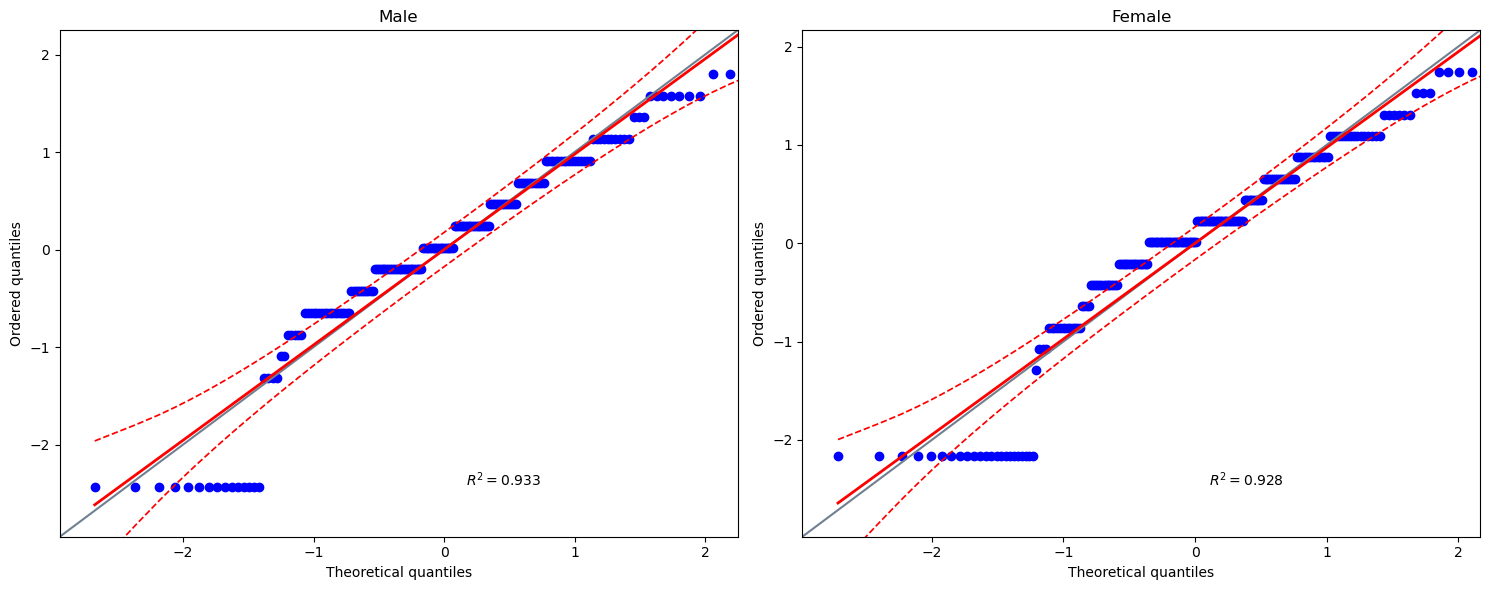

In [15]:
# This type of representation allows a preliminary identification if the data have normality 
# As we can see both of them does not have. 

fig, axs = plt.subplots(1,2, figsize=(15,6))
pg.qqplot(df.loc[df.sex == 'M', 'score'], dist='norm', ax=axs[0])
axs[0].set_title('Male')
pg.qqplot(df.loc[df.sex == 'F', 'score'], dist='norm', ax=axs[1])
axs[1].set_title('Female')
plt.tight_layout()

# Students per age

In [16]:
pce = df['age'].value_counts()
pce

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Text(0.5, 1.0, 'Students per age')

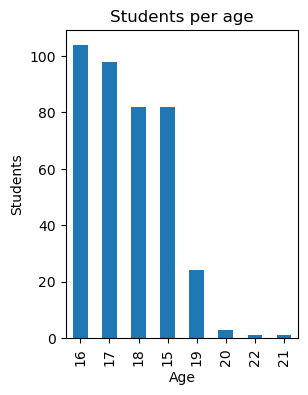

In [117]:
df['age'].value_counts().plot(kind = 'bar', figsize = (3,4),)
plt.ylabel('Students')
plt.xlabel('Age')
plt.title('Students per age')

Distribution percentage per age


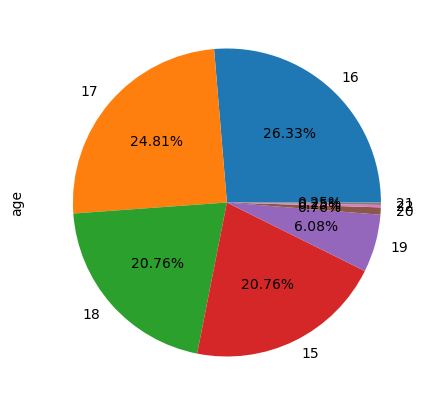

In [84]:
print('Distribution percentage per age')
pce = df['age'].value_counts().plot(kind = 'pie', figsize = (5,5), autopct = '%.2f%%' )

In [97]:
seage = df.pivot_table(
    values="score", index="age", columns="sex", aggfunc= 'count'
)
seage

sex,F,M
age,,
15,38.0,44.0
16,54.0,50.0
17,58.0,40.0
18,43.0,39.0
19,14.0,10.0
20,1.0,2.0
21,NaN,1.0
22,NaN,1.0


Text(0.5, 1.0, 'Students per gender and per age')

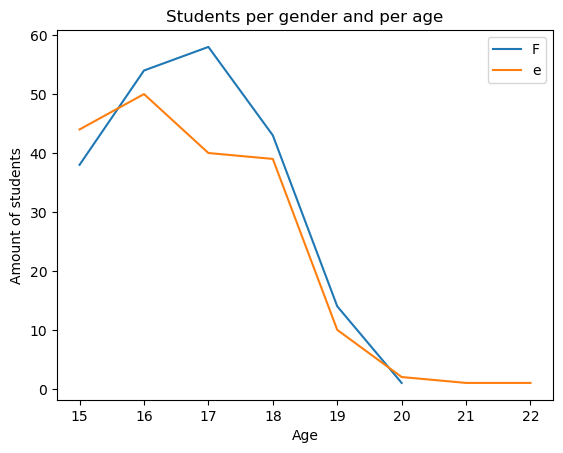

In [25]:
ax = plt.subplots ()
ax = plt.plot(seage)
plt.ylabel('Amount of students')
plt.xlabel('Age')
plt.legend('Female')


plt.title('Students per gender and per age')


Text(0.5, 1.0, 'Hola')

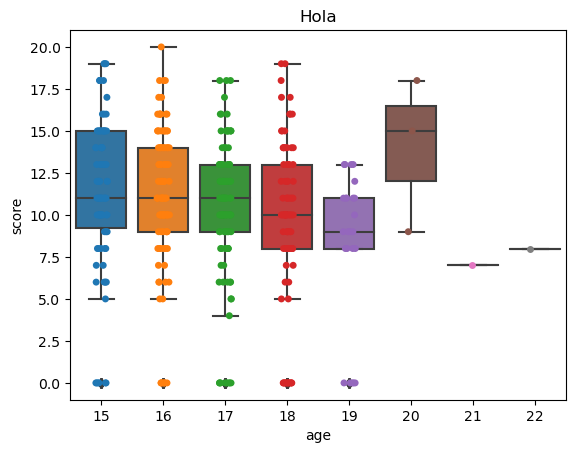

In [24]:
# This type of representation allows a preliminary identification of asymmetries, outliers and difference in variance
# In this case 4 grupos seem to follow asymmetrical distribution.
# All of them some values are extreme 
# Not all the size of the boxes is similar so, there is a indication of a lack of homoscedasticity

ax = sns.boxplot(x='age', y='score', data=df)
ax = sns.stripplot(x= 'age', y= 'score', data=df)


plt.title('Hola')

In [26]:
smdte = df.groupby('age')['score'].agg(['mean','std'])
smdte


,mean,std
age,,
15,11.256098,4.596861
16,11.028846,4.282402
17,10.275510,4.290437
18,9.548780,4.994200
19,8.208333,4.606037
20,14.000000,4.582576
21,7.000000,NaN
22,8.000000,NaN


Text(0.5, 1.0, 'Mean and Distribution of Age')

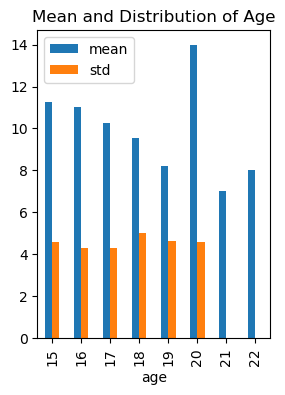

In [118]:
smdte.plot(kind = 'bar', figsize = (3,4),)
plt.title('Mean and Distribution of Age')


# Study time per gender

In [86]:
# In the next table you can see the hours of study time per gender
# The most popular study time in this analisis is: 2 - 5 hours

hesg = df.pivot_table(values="score", index="studytime", columns="sex", aggfunc= 'count')
hesg

sex,F,M
studytime,,
1. <2 hours,27,78
2. 2 - 5 hours,113,85
3. 5 - 10 hours,51,14
4. >10 hours,17,10


Text(0, 0.5, 'Students')

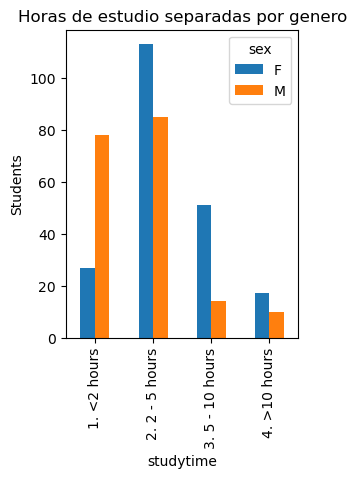

In [89]:
hesg.plot(kind = 'bar', figsize = (3,4),)
plt.title('Study time per gender')
plt.ylabel('Students')

# Students with passing and failing score

In [109]:
ap_y = df[(df.score >10)].count()[0]
ap_y
print('The next result represents the amount of the students with a passing grade, which means that their score was higher than 10:',
      ap_y)

The next result represents the amount of the students with a passing grade, which means that their score was higher than 10: 209


In [119]:
ap_n = df.loc[df['score'] <= 10].count()[0]
ap_n

print('The next result represents the amount of the students with a passing grade, which means that their score was 10 or lower:', ap_n)

The next result represents the amount of the students with a passing grade, which means that their score was 10 or lower: 186


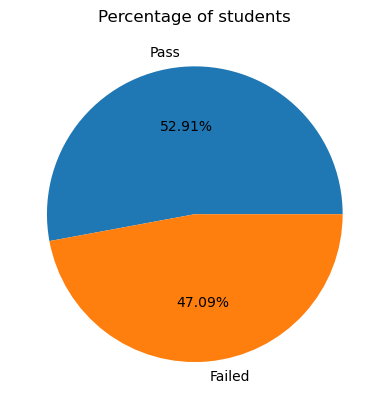

In [120]:
labels = ['Pass', 'Failed']

plt.pie([ap_y,ap_n],labels = labels, autopct = '%.2f%%')

plt.title('Percentage of students')
plt.show()

# Female students who pass and failed score

In [108]:
# This result is the amount of female students that have a failing score

mf = df[(df.sex == 'F') & (df.score > 10)].count()[0]
mf

103

In [101]:
# This result is the amount of female students that have a passing score

mf1 = df[(df.sex == 'F') & (df.score <= 10)].count()[0]
mf1

105

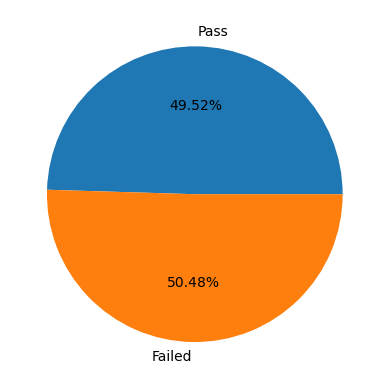

In [121]:
ldhi = lables = ['Pass','Failed']
plt.pie([mf,mf1],labels = ldhi, autopct = '%.2f%%')
plt.show()

# Female - passing score vs study time 

In [29]:
mstf = df[(df.sex == 'F') & (df.score > 10) & (df.studytime =='1. <2 hours')].count()[0]
mstf

14

In [30]:
mstf1 = df[(df.sex == 'F') & (df.score > 10) & (df.studytime =='2. 2 - 5 hours')].count()[0]
mstf1

49

In [31]:
mstf2 = df[(df.sex == 'F') & (df.score > 10) & (df.studytime =='3. 5 - 10 hours')].count()[0]
mstf2

29

In [32]:
mstf3 = df[(df.sex == 'F') & (df.score > 10) & (df.studytime =='4. >10 hours')].count()[0]
mstf3

11

# Male students who pass and failed score

In [103]:
# This result is the amount of male students that have a passing score
mr = df[(df.sex == 'M') & (df.score > 10)].count()[0]
mr

106

In [104]:
# This result is the amount of male students that have a failing score
ma = df[(df.sex == 'M') & (df.score <= 10)].count()[0]
ma

81

Percentage of students by score


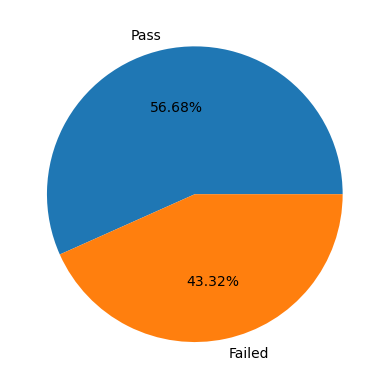

In [115]:
lmpd = lables = ['Pass','Failed']
plt.pie([mr,ma],labels = lmpd, autopct = '%.2f%%')
print ('Percentage of students by score')
plt.show()

# Male - score vs study time

In [33]:
mstf = df[(df.sex == 'M') & (df.score > 10) & (df.studytime =='1. <2 hours')].count()[0]
mstf

37

In [34]:
mstf1 = df[(df.sex == 'M') & (df.score > 10) & (df.studytime =='2. 2 - 5 hours')].count()[0]
mstf1

51

In [35]:
mstf2 = df[(df.sex == 'M') & (df.score > 10) & (df.studytime =='3. 5 - 10 hours')].count()[0]
mstf2

12

In [36]:
mstf3 = df[(df.sex == 'M') & (df.score > 10) & (df.studytime =='4. >10 hours')].count()[0]
mstf3

6

# Mean - Study time, Age and Gender

In [37]:
df.pivot_table(
    values="score", index=(["studytime","age"]), columns="sex", aggfunc= (['mean','std'])
    )


mean                  std          
sex                          F          M         F         M
studytime       age                                          
1. <2 hours     15   10.857143  13.357143  6.039552  2.898465
                16   10.333333  10.400000  4.330127  5.515131
                17    8.875000   9.882353  5.436320  4.768154
                18    8.666667   8.285714  2.309401  4.427685
                19         NaN   5.000000       NaN  4.582576
                20         NaN  18.000000       NaN       NaN
                21         NaN   7.000000       NaN       NaN
                22         NaN   8.000000       NaN       NaN
2. 2 - 5 hours  15    8.944444  12.700000  3.701704  4.612340
                16   10.542857  11.736842  3.950747  2.959769
                17   10.037037  10.043478  4.318845  2.976854
                18    8.440000   9.941176  4.975607  4.892221
                19    7.625000  11.000000  4.897157  1.870829
                20         NaN   9.000000       NaN       NaN
3. 5 - 10 hours 15    9.000000  15.000000  5.500000  3.605551
                16   11.285714  15.000000  3.302236  3.559026
                17   11.421053        NaN  3.775885       NaN
                18   10.700000  12.714286  6.750309  2.288689
                19    9.600000        NaN  5.458938       NaN
                20   15.000000        NaN       NaN       NaN
4. >10 hours    15   11.250000  10.571429  3.403430  5.028490
                16    9.333333  17.500000  2.886751  3.535534
                17   12.250000        NaN  8.500000       NaN
                18   11.400000   8.000000  6.618157       NaN
                19    8.000000        NaN       NaN       NaN

# Students with and without internet

In [42]:
inter_n = df.loc[df['internet'] == 'no'].count()[0]
inter_n

print('The next result represents the amount of the students that do not have internet:',inter_n)

The next result represents the amount of the students that do not have internet: 66


In [43]:
inter_y = df.loc[df['internet'] == 'yes'].count()[0]
inter_y

print('The next result represents the amount of the students that have internet:',inter_y)

The next result represents the amount of the students that have internet: 329


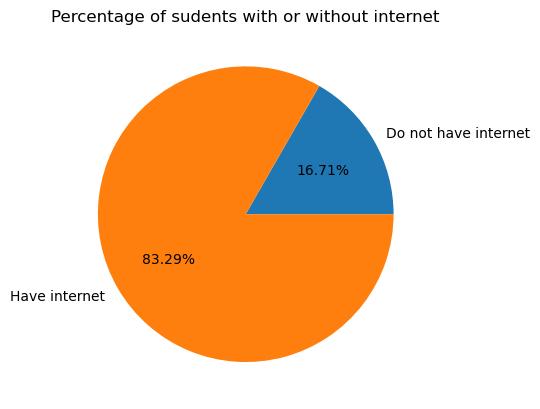

In [116]:
labels = ['Do not have internet', 'Have internet']

plt.pie([inter_n,inter_y],labels = labels, autopct = '%.2f%%')

plt.title('Percentage of sudents with or without internet')
plt.show()

# Gender significant for a passing score

Null hypothesis: The gender does not matter to have a passing score
H0: μ1=μ2=…=μp

Alternative hypothesis: The gender matter to have a passing score
H1: All μ are not equal

In [98]:
pg.anova(
    data = df,
    dv = 'score',
    between = ['sex'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,sex,88.5134,1,88.5134,4.2518,0.0399,0.0107
1,Within,8181.3954,393,20.8178,NaN,NaN,NaN


The p value obtained form ANOVA analysis for gender are not significant. 


The null hypothesis is accepted because the p value is lower than beta.

We conclude that gender does not affects the score.

In [99]:
df.groupby('sex')['score'].agg(['mean','std'])

,mean,std
sex,,
F,9.966346,4.622338
M,10.914439,4.495297


# Internet significant for a passing score

Null hypothesis: Have internet does not matter to have a passing score
H0: μ1=μ2=…=μp

Alternative hypothesis: Have internet matter to have a passing score
H1: All μ are not equal

In [48]:
pg.anova(
    data = df,
    dv = 'score',
    between = ['internet'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,internet,80.2096,1,80.2096,3.849,0.0505,0.0097
1,Within,8189.6992,393,20.8389,NaN,NaN,NaN


The p value obtained form ANOVA analysis for internet is statistically significant. 


The null hypothesis is rejected because the p value is higher than beta.

We conclude that internet affects the score.

In [49]:
df.groupby('internet')['score'].agg(['mean','std'])

,mean,std
internet,,
no,9.409091,4.485797
yes,10.617021,4.580494


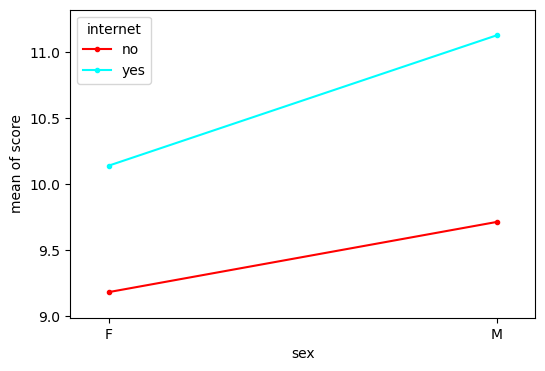

In [106]:
# In the following graphic you can analyse the behavior of both of the gender 
# Internet vs score

fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.sex, 
    trace    = df.internet,
    response = df.score,
    ax       = ax,
)

# Study time significant for a passing score

Null hypothesis: Study time does not matter to have a passing score
H0: μ1=μ2=…=μp

Alternative hypothesis: Study time matter to have a passing score
H1: All μ are not equal

In [52]:
pg.anova(
    data = df,
    dv = 'score',
    between = ['studytime'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,studytime,108.2002,3,36.0667,1.7278,0.1607,0.0131
1,Within,8161.7087,391,20.8739,NaN,NaN,NaN


The p value obtained form ANOVA analysis for study time is statistically significant. 


The null hypothesis is rejected because the p value is higher than beta.

We conclude that study time affects the score.

In [53]:
df.groupby('studytime')['score'].agg(['mean','std'])

,mean,std
studytime,,
1. <2 hours,10.047619,4.956311
2. 2 - 5 hours,10.171717,4.217537
3. 5 - 10 hours,11.400000,4.639504
4. >10 hours,11.259259,5.281263


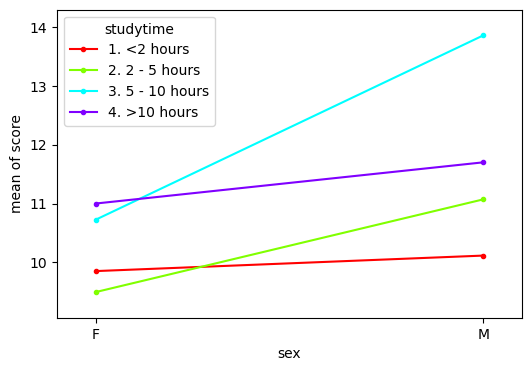

In [62]:
# In the following graphic you can analyse the behavior of both of the gender 
# Study time vs score

fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.sex,
    trace    = df.studytime,
    response = df.score,
    ax       = ax,
)

# Family size significant for a passing score

Null hypothesis: The family size does not matter to have a passing score
H0: μ1=μ2=…=μp

Alternative hypothesis: The family size matter to have a passing score
H1: All μ are not equal

In [54]:
pg.anova(
    data = df,
    dv = 'score',
    between = ['familysize'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,familysize,54.8057,1,54.8057,2.6218,0.1062,0.0066
1,Within,8215.1032,393,20.9036,NaN,NaN,NaN


The p value obtained form ANOVA analysis for family size is statistically significant. 


The null hypothesis is rejected because the p value is higher than beta.

We conclude that family size affects the score.

In [55]:
df.groupby('familysize')['score'].agg(['mean','std'])

,mean,std
familysize,,
<=3,11.000000,4.225921
>3,10.177936,4.704520


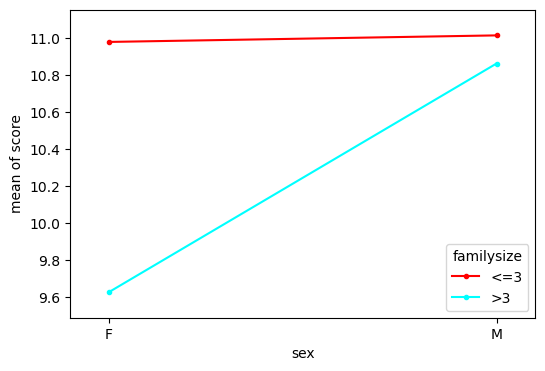

In [64]:
# In the following graphic you can analyse the behavior of both of the gender 
# Family size vs score

fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.sex,
    trace    = df.familysize,
    response = df.score,
    ax       = ax,
)

# Age significant for a passing score

Null hypothesis: The age does not matter to have a passing score
H0: μ1=μ2=…=μp

Alternative hypothesis: The age matter to have a passing score
H1: All μ are not equal

In [56]:
pg.anova(
    data = df,
    dv = 'score',
    between = ['age'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,age,333.5490,7,47.6499,2.3235,0.0248,0.0403
1,Within,7936.3598,387,20.5074,NaN,NaN,NaN


The p value obtained form ANOVA analysis for age are not significant. 

The null hypothesis is accepted because the p value is lower than beta.

We conclude that age does not affects the score.

In [57]:
print('score medio y desviacion tipica por edad')
df.groupby('age')['score'].agg(['mean','std'])

score medio y desviacion tipica por edad


,mean,std
age,,
15,11.256098,4.596861
16,11.028846,4.282402
17,10.275510,4.290437
18,9.548780,4.994200
19,8.208333,4.606037
20,14.000000,4.582576
21,7.000000,NaN
22,8.000000,NaN


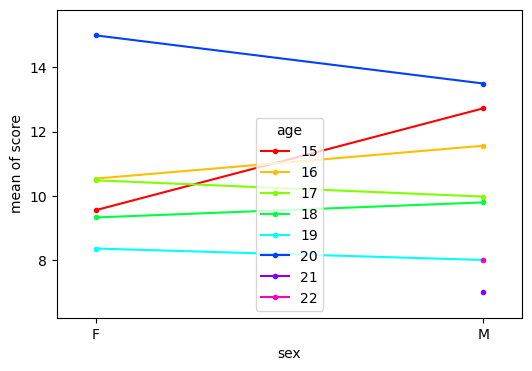

In [123]:
# In the following graphic you can analyse the behavior of both of the gender 
# Age vs score

fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.sex,
    trace    = df.age,
    response = df.score,
    ax       = ax,
)
